In [1]:
!pip3 install pandas
!pip3 install duckdb
!pip3 install seaborn
!pip3 install matplotlib
!pip3 install plotly

In [2]:
import pandas as pd
import duckdb as db
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("financial_data.csv")
data

,Date,Revenue,Expenses,Profit
0,2023-07-23,6779,9187,-2408
1,2023-11-11,15221,7708,7513
2,2023-12-07,8686,8693,-7
3,2023-05-01,5711,4666,1045
4,2023-01-18,6852,9987,-3135
...,...,...,...,...
995,2023-03-10,14458,9134,5324
996,2023-12-01,9571,3588,5983
997,2023-01-30,8672,8553,119
998,2023-03-03,15714,2261,13453


In [4]:
data.isnull().sum()

Date        0
Revenue     0
Expenses    0
Profit      0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      1000 non-null   object
 1   Revenue   1000 non-null   int64 
 2   Expenses  1000 non-null   int64 
 3   Profit    1000 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 31.4+ KB


rata-rata, median, maksimum, minimum, dan standar deviasi dari pendapatan (Revenue), biaya (Expenses), dan laba (Profit)


In [6]:
data.describe()

,Revenue,Expenses,Profit
count,1000.000000,1000.000000,1000.000000
mean,12311.360000,5979.476000,6331.884000
std,4362.996684,2342.899236,4969.539125
min,5023.000000,2004.000000,-4022.000000
25%,8472.750000,3868.750000,2584.000000
50%,12179.500000,5965.000000,6286.000000
75%,15959.750000,8188.500000,10029.750000
max,19989.000000,9999.000000,17869.000000


grafik untuk menunjukkan tren bulanan pendapatan (Revenue) dan laba (Profit) selama tahun 2023

In [7]:
import dateutil
import datetime
def parse_date(column_value:str) -> datetime.datetime:
    return dateutil.parser.parse(column_value)
data['Date'] = data['Date'].apply(parse_date)

In [8]:
revenue_data = data[['Date', 'Revenue']]
revenue_data['Bulan'] = revenue_data['Date'].dt.month_name()
revenue_data = revenue_data.groupby("Bulan")['Revenue'].sum()
nama_bulan = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
revenue_data = revenue_data.reindex(nama_bulan)
revenue_data


/var/folders/16/3klh70sn4rd_4qw1rx6f2yhw0000gn/T/ipykernel_3733/370607717.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  revenue_data['Bulan'] = revenue_data['Date'].dt.month_name()


Bulan
January      1296287
February      971880
March        1068769
April        1011152
May           952889
June          735624
July         1063433
August        984361
September     910322
October      1085513
November     1195057
December     1036073
Name: Revenue, dtype: int64

In [9]:
profit_data = data[['Date', 'Profit']]
profit_data['Bulan'] = profit_data['Date'].dt.month_name()
profit_data = profit_data.groupby("Bulan")['Profit'].sum()
profit_data = profit_data.reindex(nama_bulan)
profit_data

/var/folders/16/3klh70sn4rd_4qw1rx6f2yhw0000gn/T/ipykernel_3733/2585004493.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profit_data['Bulan'] = profit_data['Date'].dt.month_name()


Bulan
January      666442
February     508637
March        569086
April        544902
May          461561
June         366990
July         535871
August       504072
September    464841
October      595927
November     616476
December     497079
Name: Profit, dtype: int64

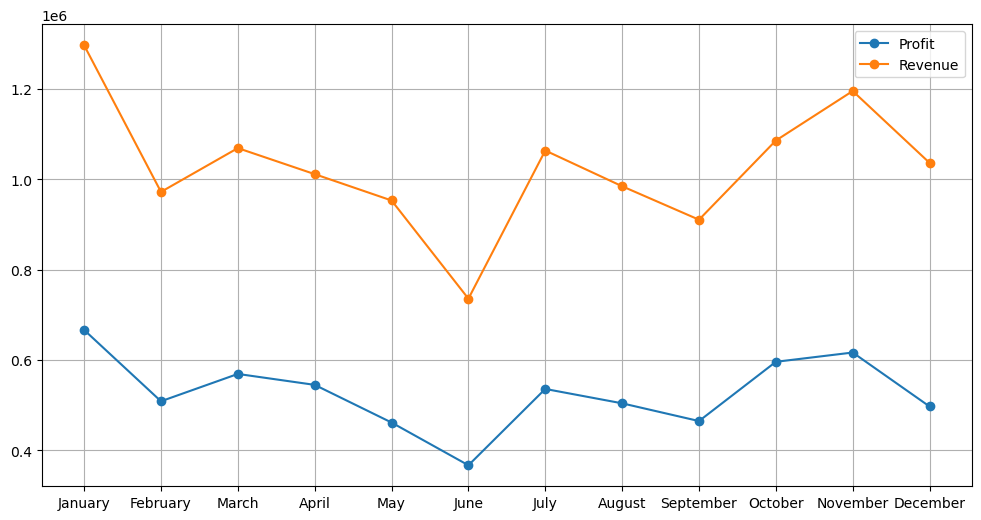

In [10]:
plt.figure(figsize=(12,6))
plt.plot(profit_data, label = "Profit", marker = 'o')
plt.plot(revenue_data, label = "Revenue", marker = "o")
plt.legend()
plt.grid()


Rasio laba (Profit) terhadap biaya (Expenses) setiap bulan

In [11]:
data['Bulan'] = data['Date'].dt.month_name()
new_data = data.groupby('Bulan')[['Profit', 'Expenses']].sum()
new_data = new_data.reindex(nama_bulan)
new_data

,Profit,Expenses
Bulan,,
January,666442,629845
February,508637,463243
March,569086,499683
April,544902,466250
May,461561,491328
June,366990,368634
July,535871,527562
August,504072,480289
September,464841,445481


In [12]:
ratio = pd.DataFrame(columns=['Bulan','Profit','Expenses'])
ratio['Bulan'] = new_data.index
ratio['Profit'] = new_data['Profit'].to_dict().values()
ratio['Expenses'] = new_data['Expenses'].to_dict().values()
ratio

,Bulan,Profit,Expenses
0,January,666442,629845
1,February,508637,463243
2,March,569086,499683
3,April,544902,466250
4,May,461561,491328
5,June,366990,368634
6,July,535871,527562
7,August,504072,480289
8,September,464841,445481
9,October,595927,489586


In [13]:
ratio['Ratio'] = ratio['Profit'].div(ratio['Expenses'])
ratio

,Bulan,Profit,Expenses,Ratio
0,January,666442,629845,1.058105
1,February,508637,463243,1.097992
2,March,569086,499683,1.138894
3,April,544902,466250,1.168691
4,May,461561,491328,0.939415
5,June,366990,368634,0.995540
6,July,535871,527562,1.015750
7,August,504072,480289,1.049518
8,September,464841,445481,1.043459
9,October,595927,489586,1.217206


<Axes: xlabel='Bulan', ylabel='Ratio'>

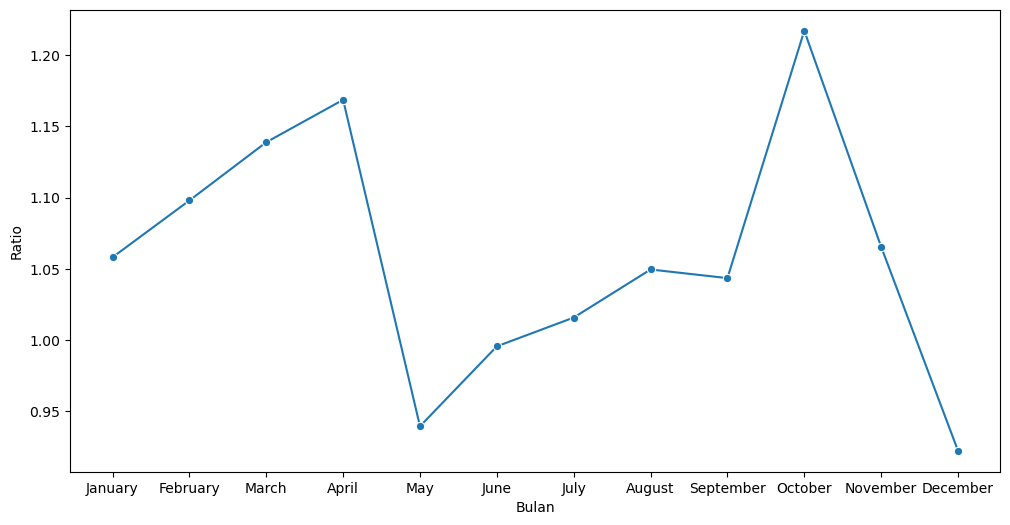

In [14]:
plt.figure(figsize=(12,6))
sns.lineplot(data = ratio, x='Bulan',y='Ratio',marker="o")

Analisis untuk mengetahui bulan mana yang memiliki laba bersih tertinggi dan terendah.

In [15]:
ratio.sort_values(ascending=False, by='Ratio')

,Bulan,Profit,Expenses,Ratio
9,October,595927,489586,1.217206
3,April,544902,466250,1.168691
2,March,569086,499683,1.138894
1,February,508637,463243,1.097992
10,November,616476,578581,1.065496
0,January,666442,629845,1.058105
7,August,504072,480289,1.049518
8,September,464841,445481,1.043459
6,July,535871,527562,1.015750
5,June,366990,368634,0.995540


Model prediktif sederhana (regresi linier) untuk memprediksi pendapatan (Revenue) berdasarkan biaya (Expenses)

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

In [17]:
x = data[['Expenses']]
y = data['Revenue']

In [18]:
x_train, x_test, y_train , y_test = train_test_split(x, y, test_size=0.2, random_state=0)
model = LinearRegression()
model.fit(x_train,y_train)

y_pred = model.predict(x_test)

print(f"mean_squared_error = {mean_squared_error(y_test,y_pred)}")
print(f"r2_score = {r2_score(y_test, y_pred)}")

mean_squared_error = 19996131.218420148
r2_score = -0.0064182338223759405


perkiraan pendapatan jika biaya diubah menjadi 5000

In [19]:
print(f"jika pendapatan 5000 : {model.predict([[5000]])}")

jika pendapatan 5000 : [12397.89729063]


/Users/paima/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


koefisien korelasi antara pendapatan (Revenue) dan laba (Profit)

In [20]:
korelasi = data[["Revenue","Profit"]].corr()
korelasi

,Revenue,Profit
Revenue,1.000000,0.881901
Profit,0.881901,1.000000


<Axes: >

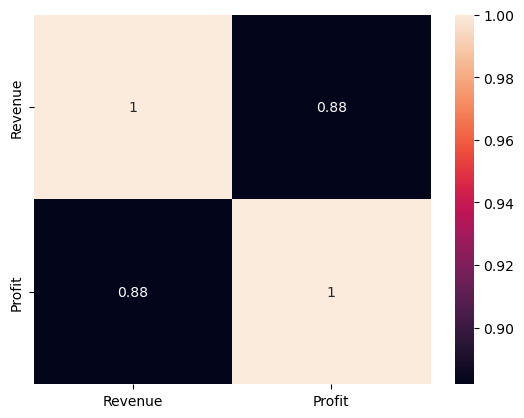

In [21]:
sns.heatmap(korelasi,annot=True)

Outlier (pencilan) dalam data pendapatan (Revenue) atau biaya (Expenses)

<Axes: >

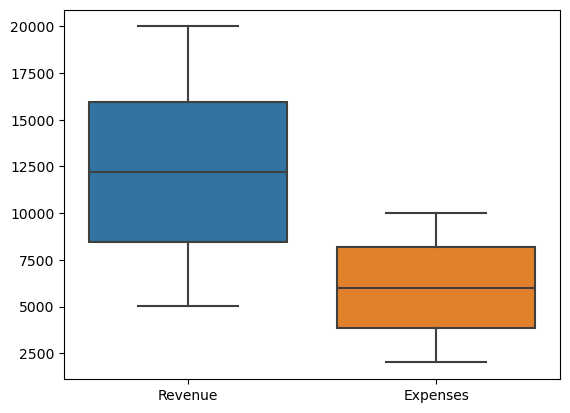

In [22]:
sns.boxplot(data[['Revenue','Expenses']])

Proyeksi kinerja keuangan untuk tahun berikutnya berdasarkan tren dari tahun 2023.


In [23]:
from statsmodels.tsa.arima.model import ARIMA

In [24]:
profit_data

Bulan
January      666442
February     508637
March        569086
April        544902
May          461561
June         366990
July         535871
August       504072
September    464841
October      595927
November     616476
December     497079
Name: Profit, dtype: int64

In [25]:
model = ARIMA(profit_data, order=(1,1,1))
result = model.fit()
forecast = result.forecast(steps=12)
forecast_index = pd.date_range(start='2024-01-01', periods=12, freq='M')

/Users/paima/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/Users/paima/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/paima/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/Users/paima/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecas

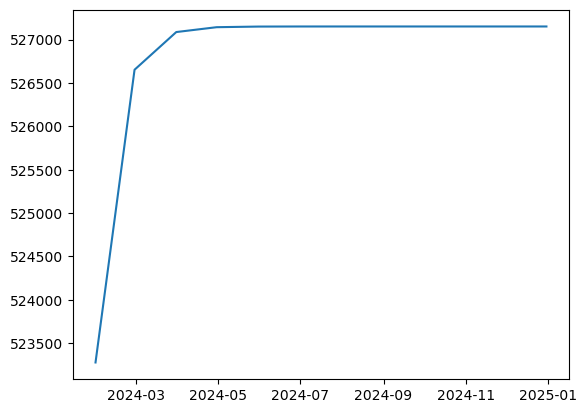

In [26]:
plt.plot(forecast_index, forecast,)

Margin keuntungan (profit margin) pada setiap bulan

In [27]:
monthly_profit = data.groupby('Bulan')['Profit'].sum().reindex(nama_bulan)
monthly_profit

Bulan
January      666442
February     508637
March        569086
April        544902
May          461561
June         366990
July         535871
August       504072
September    464841
October      595927
November     616476
December     497079
Name: Profit, dtype: int64

In [28]:
data['Bulan']

0          July
1      November
2      December
3           May
4       January
         ...   
995       March
996    December
997     January
998       March
999    February
Name: Bulan, Length: 1000, dtype: object

<BarContainer object of 12 artists>

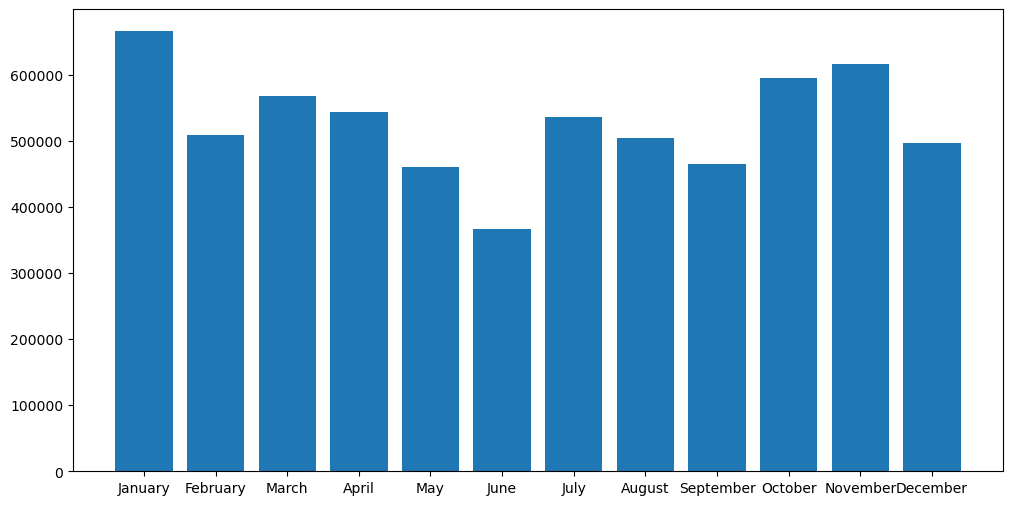

In [29]:
plt.figure(figsize=(12,6))
plt.bar(x=monthly_profit.index,height=monthly_profit.values)